In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.cluster.hierarchy as shc

from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

from sklearn.metrics import confusion_matrix

from sklearn import datasets

%matplotlib inline
pd.set_option("display.max_columns", None)

In [2]:
# load in the data
airbnb = pd.read_csv("filtered_nyc_airbnb_2019.csv")
airbnb = airbnb.dropna()
airbnb.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [3]:
# remove boroughs and room types
X = airbnb.iloc[:, [7, 8, 10, 11, 12, 14, 15, 16]]
X.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,0.21,6,365
1,40.75362,-73.98377,225,1,45,0.38,2,355
3,40.68514,-73.95976,89,1,270,4.64,1,194
4,40.79851,-73.94399,80,10,9,0.10,1,0
5,40.74767,-73.97500,200,3,74,0.59,1,129


In [4]:
# scale the data 
scaler = MinMaxScaler(feature_range=(0, 1))
airbnb_scaled = scaler.fit_transform(X)

In [5]:
# turn the scaled data back to a dataframe
airbnb_scaled = pd.DataFrame(airbnb_scaled, columns = X.columns)
airbnb_scaled.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,0.346932,0.511921,0.298,0.000000,0.012739,0.003419,0.015337,1.000000
1,0.607918,0.490469,0.450,0.000000,0.070064,0.006326,0.003067,0.972603
2,0.439518,0.535649,0.178,0.000000,0.428344,0.079159,0.000000,0.531507
3,0.718308,0.565324,0.160,0.300000,0.012739,0.001539,0.000000,0.000000
4,0.593287,0.506972,0.400,0.066667,0.116242,0.009916,0.000000,0.353425


In [6]:
# run k-means clustering on the data
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_clusters = kmeans.fit_predict(airbnb_scaled)
kmeans_clusters

array([0, 0, 0, ..., 2, 2, 2])

In [7]:
# add the clusters to the dataset
airbnb["kmeans_clusters"] = kmeans_clusters

In [8]:
# these are the room types we anticipate the clustering algorithm will assign the rooms in
airbnb["room_type"].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [9]:
first_kmean_cluster_filter = airbnb["kmeans_clusters"] == 0
first_kmean_cluster = airbnb[first_kmean_cluster_filter]
first_kmean_cluster.sample(15)

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,kmeans_clusters
34298,35652,28309473,Your Cozy Room,213781715,Anting,Brooklyn,Greenpoint,40.73286,-73.95086,Private room,99,1,5,2019-04-21,0.51,33,365,0
44173,46013,35031778,#GorgeousLowerEast2BedroomGem! #3minWalktoTrain!,263886728,Anslo,Manhattan,Lower East Side,40.71949,-73.98607,Entire home/apt,400,4,5,2019-06-30,3.75,1,327,0
21981,22895,18549222,Private room in Astoria close to Manhattan,128768798,Ruth,Queens,Ditmars Steinway,40.77949,-73.91015,Private room,78,2,69,2019-07-01,2.65,1,166,0
41321,43001,33389926,"Cozy Private Room, Walking Distance From LGA, ...",187822288,Zahir,Queens,East Elmhurst,40.77102,-73.87287,Private room,55,1,42,2019-06-24,12.12,5,153,0
15329,15992,12932670,Flushing Spacious Room w/ 2 Queen Beds,65809485,Shirley,Queens,Flushing,40.74954,-73.82829,Private room,60,5,62,2019-06-18,1.64,12,174,0
22173,23096,18704413,Large Private Suite in Classic Brooklyn Browns...,130035533,Linda,Brooklyn,Brooklyn Heights,40.69364,-73.99467,Entire home/apt,200,2,80,2019-06-28,3.14,1,271,0
41505,43195,33509538,WALK TO FREE SI FERRY FROM FURNISHED STUDIO APT,160956,Neil,Staten Island,St. George,40.64015,-74.08127,Entire home/apt,99,3,4,2019-06-28,2.31,1,326,0
40972,42637,33097224,Spacious Luxury 2B2B in the Heart of Manhattan,248554249,Ammy,Manhattan,Midtown,40.74362,-73.98207,Entire home/apt,388,3,13,2019-06-21,3.61,1,246,0
13604,14192,10943915,Historic Sugar Hill 2 Bdrm Apt Great For famil...,56710089,Kate,Manhattan,Harlem,40.82630,-73.94375,Entire home/apt,198,5,42,2019-06-03,1.07,1,267,0
44672,46549,35311495,Manhattan Best Location Comfortable Space -1~2p,179336958,Ruby,Manhattan,Midtown,40.74667,-73.98513,Private room,120,3,1,2019-06-22,1.00,6,364,0


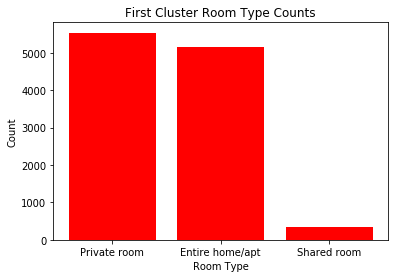

In [10]:
vc = first_kmean_cluster["room_type"].value_counts()
plt.bar(vc.index, vc.values, color = "red")
plt.title("First Cluster Room Type Counts")
plt.xlabel("Room Type")
plt.ylabel("Count")
plt.savefig("plots/first_cluster_room_type.png")

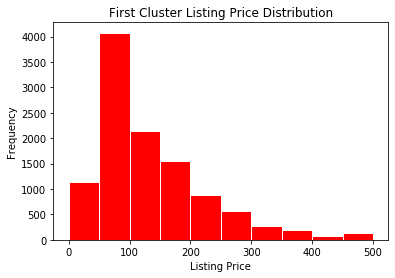

In [11]:
first_kmean_cluster["price"].hist(grid = False, edgecolor = "white", color = "red")
plt.title("First Cluster Listing Price Distribution")
plt.xlabel("Listing Price")
plt.ylabel("Frequency")
plt.savefig("plots/first_cluster_price_dist.png")

In [12]:
second_kmean_cluster_filter = airbnb["kmeans_clusters"] == 1
second_kmean_cluster = airbnb[second_kmean_cluster_filter]
second_kmean_cluster.sample(15)

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,kmeans_clusters
37646,39152,30548591,FEMALE SHARED ROOM3 Single Beds Near Subway-3,172369331,Abby,Brooklyn,Coney Island,40.57863,-73.98455,Shared room,29,18,1,2019-02-15,0.21,10,221,1
31788,33053,26074006,Nice & Spacious Manhattan Room Near the Station,137358866,Kazuya,Manhattan,Harlem,40.81217,-73.94406,Private room,52,30,2,2019-06-04,0.19,103,214,1
7890,8299,6384383,Penthouse Triplex/ Union Sq / Roof,1245695,Chris,Manhattan,East Village,40.73249,-73.98870,Private room,200,30,8,2016-10-22,0.16,1,365,1
28675,29813,22938753,Luxury Studio near Central Park - Times Square,4920221,UBliss,Manhattan,Midtown,40.76551,-73.98315,Entire home/apt,189,29,3,2018-10-27,0.27,1,358,1
21441,22336,18025342,"1BR near Mt Sinai, Columbia, Cent Pk. Must See!",6752799,Zach,Manhattan,East Harlem,40.79720,-73.94749,Private room,45,28,1,2017-07-02,0.04,2,147,1
42347,44071,34020040,"Homey, Friendly Apt Share Next To Subway",253836845,Ollie,Brooklyn,Crown Heights,40.67058,-73.95730,Private room,68,30,1,2019-05-21,0.60,7,226,1
13635,14225,11005300,East Village Sanctuary,57107571,Molly,Manhattan,East Village,40.72808,-73.98763,Entire home/apt,200,30,22,2019-06-09,0.65,1,112,1
35066,36441,28976135,1Great Budget Private Room,209298687,Digna,Brooklyn,Bedford-Stuyvesant,40.68937,-73.94992,Private room,65,30,13,2019-05-27,1.45,4,357,1
25592,26621,21175597,Sunny church view room in Harlem brownstone,8637211,Judie And Steven,Manhattan,Harlem,40.81899,-73.94584,Private room,70,30,29,2019-05-28,1.36,4,292,1
23142,24098,19414813,1BR - Heart of West Village - 30 Day Min - Unit 2,4422523,Marie,Manhattan,West Village,40.73392,-74.00354,Entire home/apt,150,30,3,2019-01-24,0.17,6,286,1


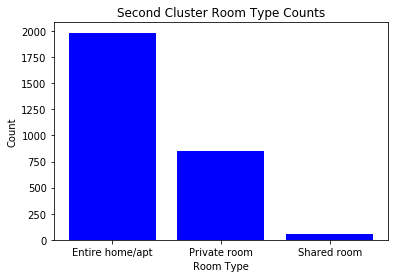

In [13]:
vc = second_kmean_cluster["room_type"].value_counts()
plt.bar(vc.index, vc.values, color = "b")
plt.title("Second Cluster Room Type Counts")
plt.xlabel("Room Type")
plt.ylabel("Count")
plt.savefig("plots/second_cluster_room_type.png")

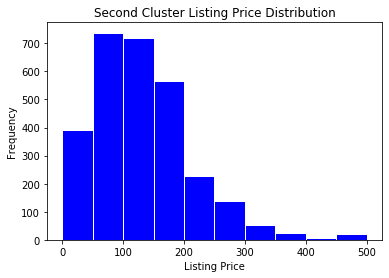

In [14]:
second_kmean_cluster["price"].hist(grid = False, edgecolor = "white", color = "b")
plt.title("Second Cluster Listing Price Distribution")
plt.xlabel("Listing Price")
plt.ylabel("Frequency")
plt.savefig("plots/second_cluster_price_dist.png")

In [15]:
third_kmean_cluster_filter = airbnb["kmeans_clusters"] == 2
third_kmean_cluster = airbnb[third_kmean_cluster_filter]
third_kmean_cluster.sample(15)

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,kmeans_clusters
34918,36290,28869774,Light-filled studio in East Williamsburg,19874189,Ali,Brooklyn,Williamsburg,40.71598,-73.94300,Entire home/apt,160,4,6,2019-06-26,0.69,1,10,2
33445,34777,27571163,"Beautiful S Williamsburg 1 Bdrm near G,L,J,M,Z",24862289,Thaddeus,Brooklyn,Williamsburg,40.70865,-73.94631,Entire home/apt,150,4,9,2019-06-30,0.89,1,0,2
33385,34715,27528267,Amazing room & private en-suite bath in Brooklyn!,17518954,Rashmi,Brooklyn,Bedford-Stuyvesant,40.69038,-73.93101,Private room,79,3,44,2019-07-01,4.06,1,91,2
13710,14304,11128811,Cozy Walk up apartment in a great neighborhood!,42779345,Jodi,Queens,Long Island City,40.74523,-73.94906,Private room,50,2,3,2019-02-17,0.41,1,0,2
32079,33355,26356082,Entire Greenpoint / North Williamsburg Gem,1828429,Lola,Brooklyn,Greenpoint,40.72756,-73.95628,Entire home/apt,140,3,1,2019-05-25,0.67,1,36,2
30375,31576,24596296,Cozy Bed-Stuy Getaway!,20633674,Karli,Brooklyn,Bedford-Stuyvesant,40.69199,-73.94426,Private room,46,3,6,2019-03-16,0.72,1,0,2
24951,25962,20730848,Central Park and Museum mile Privarte room 105th.,42783238,Thomas,Manhattan,East Harlem,40.79383,-73.94968,Private room,85,1,98,2018-10-15,4.39,2,0,2
28001,29113,22361604,Brooklyn Palace,163516658,Calisa,Brooklyn,East New York,40.65600,-73.89719,Entire home/apt,80,1,139,2019-06-24,7.65,1,77,2
21247,22141,17824351,"Heart of East Village, Middle of Everything",30381715,Sean,Manhattan,East Village,40.72552,-73.98657,Private room,79,4,1,2017-05-13,0.04,1,0,2
14048,14659,11580884,Cozy Artists Bushwick Loft!,59075666,Das,Brooklyn,Williamsburg,40.70395,-73.93367,Private room,50,6,11,2018-09-07,0.27,1,0,2


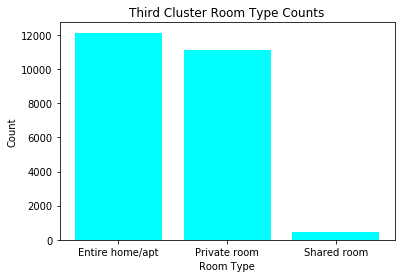

In [16]:
vc = third_kmean_cluster["room_type"].value_counts()
plt.bar(vc.index, vc.values, color = "cyan")
plt.title("Third Cluster Room Type Counts")
plt.xlabel("Room Type")
plt.ylabel("Count")
plt.savefig("plots/third_cluster_room_type.png")

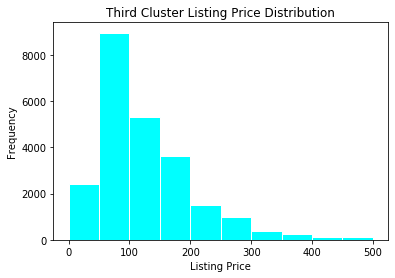

In [17]:
third_kmean_cluster["price"].hist(grid = False, edgecolor = "white", color = "cyan")
plt.title("Third Cluster Listing Price Distribution")
plt.xlabel("Listing Price")
plt.ylabel("Frequency")
plt.savefig("plots/third_cluster_price_dist.png")

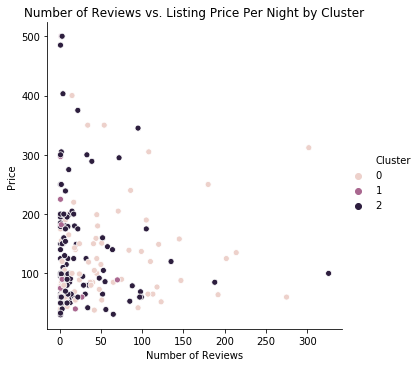

In [18]:
airbnb_sample = airbnb.sample(200)
airbnb_sample["Cluster"] = airbnb_sample["kmeans_clusters"]
sns.relplot(x = "number_of_reviews", y = "price", hue = "Cluster", data = airbnb_sample)
plt.title("Number of Reviews vs. Listing Price Per Night by Cluster")
plt.xlabel("Number of Reviews")
plt.ylabel("Price")
plt.savefig("plots/cluster_visualization.png")

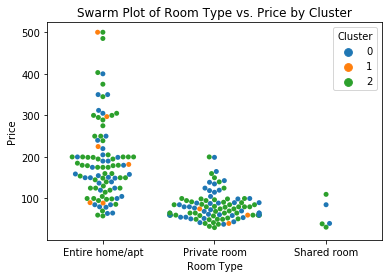

In [19]:
import seaborn as sns
# Swarm plot
sns.swarmplot(x= "room_type", y="price", hue = "Cluster", data = airbnb_sample)
plt.title("Swarm Plot of Room Type vs. Price by Cluster")
plt.xlabel("Room Type")
plt.ylabel("Price")
plt.savefig("plots/cluster_visualization2")

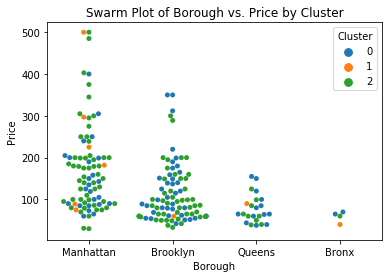

In [20]:
sns.swarmplot(x= "neighbourhood_group", y="price", hue = "Cluster", data = airbnb_sample)
plt.title("Swarm Plot of Borough vs. Price by Cluster")
plt.xlabel("Borough")
plt.ylabel("Price")
plt.savefig("plots/cluster_visualization3")

In [21]:
print("Cluster 1 Size: " + str(len(first_kmean_cluster)))
print("Cluster 2 Size: " + str(len(second_kmean_cluster)))
print("Cluster 3 Size: " + str(len(third_kmean_cluster)))

Cluster 1 Size: 11044
Cluster 2 Size: 2890
Cluster 3 Size: 23655


,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,kmeans_clusters
0,0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,0
1,1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,0
3,3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,0
4,4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,2
5,5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,2


In [25]:
# linear regression model on each cluster to check if Rsq improved
import statsmodels.formula.api as smf

filter1 = airbnb['kmeans_clusters'] == 0
airbnb1 = airbnb[filter1]

filter2 = airbnb['kmeans_clusters'] == 1
airbnb2 = airbnb[filter2]

filter3 = airbnb['kmeans_clusters'] == 2
airbnb3 = airbnb[filter3]


In [26]:
# Marginal increase from 43.4% -> 49% variation in price explained by the model
lm1 = smf.ols("price ~ latitude + longitude + neighbourhood_group + room_type", data = airbnb1).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     1326.
Date:                Sun, 24 Nov 2019   Prob (F-statistic):               0.00
Time:                        13:07:17   Log-Likelihood:                -61632.
No. Observations:               11044   AIC:                         1.233e+05
Df Residuals:                   11035   BIC:                         1.233e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                            -1.501e+04   1564.567     -9.591      0.000   -1.81e+04   -1.19e+04
neighbourhood_group[T.Brooklyn]        -20.6793      4.516     -4.580      0.000     -29.531     -11.828
neighbourhood_group[T.Manhattan]        44.6463      3.923     11.380      0.000      36.956      52.337
neighbourhood_group[T.Queens]            3.2168      4.158      0.774      0.439      -4.933      11.367
neighbourhood_group[T.Staten Island]  -102.2981      7.706    -13.275      0.000    -117.403     -87.193
room_type[T.Private room]              -94.0601      1.268    -74.185      0.000     -96.545     -91.575
room_type[T.Shared room]              -132.9524      3.561    -37.331      0.000    -139.933    -125.971
latitude                              -166.2433     17.166     -9.684      0.000    -199.892    -132.594
longitude                             -296.9021     17.916    -16.572      0.000    -332.021    -261.783
==============================================================================
Omnibus:                     3283.342   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10829.579
Skew:                           1.504   Prob(JB):                         0.00
Kurtosis:                       6.805   Cond. No.                     2.16e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
# Insignificant increase from 43.4% -> 43.5% variation in price explained by the model 
lm2 = smf.ols("price ~ latitude + longitude + neighbourhood_group + room_type", data = airbnb2).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     277.8
Date:                Sun, 24 Nov 2019   Prob (F-statistic):               0.00
Time:                        13:07:48   Log-Likelihood:                -15883.
No. Observations:                2890   AIC:                         3.178e+04
Df Residuals:                    2881   BIC:                         3.184e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                            -2.929e+04   4676.295     -6.264      0.000   -3.85e+04   -2.01e+04
neighbourhood_group[T.Brooklyn]         -7.0291     13.329     -0.527      0.598     -33.164      19.106
neighbourhood_group[T.Manhattan]        18.3977     12.670      1.452      0.147      -6.445      43.240
neighbourhood_group[T.Queens]            4.1700     13.181      0.316      0.752     -21.675      30.015
neighbourhood_group[T.Staten Island]   -99.1956     24.543     -4.042      0.000    -147.320     -51.071
room_type[T.Private room]              -82.9913      2.650    -31.319      0.000     -88.187     -77.795
room_type[T.Shared room]              -104.0352      8.233    -12.636      0.000    -120.178     -87.892
latitude                               -52.2180     39.832     -1.311      0.190    -130.320      25.884
longitude                             -426.8390     51.057     -8.360      0.000    -526.952    -326.726
==============================================================================
Omnibus:                     1173.936   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6508.227
Skew:                           1.856   Prob(JB):                         0.00
Kurtosis:                       9.345   Cond. No.                     3.60e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.6e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
# same 43.4% variation of price epxlained by the model 
lm3 = smf.ols("price ~ latitude + longitude + neighbourhood_group + room_type", data = airbnb3).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     2265.
Date:                Sun, 24 Nov 2019   Prob (F-statistic):               0.00
Time:                        13:08:03   Log-Likelihood:            -1.2908e+05
No. Observations:               23655   AIC:                         2.582e+05
Df Residuals:                   23646   BIC:                         2.582e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                             -2.23e+04   1232.532    -18.091      0.000   -2.47e+04   -1.99e+04
neighbourhood_group[T.Brooklyn]        -18.8297      3.353     -5.616      0.000     -25.401     -12.258
neighbourhood_group[T.Manhattan]        18.7602      3.110      6.032      0.000      12.664      24.856
neighbourhood_group[T.Queens]            0.3741      3.293      0.114      0.910      -6.080       6.828
neighbourhood_group[T.Staten Island]  -107.3796      7.118    -15.086      0.000    -121.331     -93.428
room_type[T.Private room]              -78.5415      0.760   -103.354      0.000     -80.031     -77.052
room_type[T.Shared room]               -99.2040      2.787    -35.598      0.000    -104.666     -93.742
latitude                              -110.6754     11.462     -9.656      0.000    -133.141     -88.210
longitude                             -364.6432     13.701    -26.614      0.000    -391.499    -337.788
==============================================================================
Omnibus:                     8518.168   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            38865.395
Skew:                           1.714   Prob(JB):                         0.00
Kurtosis:                       8.261   Cond. No.                     2.82e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.82e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
# K-Nearest Neighbor Regressor
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

In [31]:
# create dummy columns for all clusters
airbnb_dummies1 = pd.get_dummies(airbnb1, columns = ["neighbourhood_group", "room_type"])
airbnb_dummies2 = pd.get_dummies(airbnb2, columns = ["neighbourhood_group", "room_type"])
airbnb_dummies3 = pd.get_dummies(airbnb3, columns = ["neighbourhood_group", "room_type"])

In [32]:
# drop unnecessary features for all clusters
airbnb_dummies1 = airbnb_dummies1.drop(["Unnamed: 0", "id", "name", "host_id", "host_name", "neighbourhood","last_review"], axis = 1)
airbnb_dummies2 = airbnb_dummies2.drop(["Unnamed: 0", "id", "name", "host_id", "host_name", "neighbourhood","last_review"], axis = 1)
airbnb_dummies3 = airbnb_dummies3.drop(["Unnamed: 0", "id", "name", "host_id", "host_name", "neighbourhood","last_review"], axis = 1)

In [33]:
# 80-20 train-test split for all clusters
X_train1, X_test1, y_train1, y_test1 = train_test_split(airbnb_dummies1, airbnb_dummies1["price"], test_size = 0.2)
X_train2, X_test2, y_train2, y_test2 = train_test_split(airbnb_dummies2, airbnb_dummies2["price"], test_size = 0.2)
X_train3, X_test3, y_train3, y_test3 = train_test_split(airbnb_dummies3, airbnb_dummies3["price"], test_size = 0.2)

In [34]:
# scale each cluster's Xs
X_train_scaled1 = scaler.fit_transform(X_train1)
X_test_scaled1 = scaler.fit_transform(X_test1)

X_train_scaled2 = scaler.fit_transform(X_train2)
X_test_scaled2 = scaler.fit_transform(X_test2)

X_train_scaled3 = scaler.fit_transform(X_train3)
X_test_scaled3 = scaler.fit_transform(X_test3)

In [36]:
k5nn1 = KNeighborsRegressor(n_neighbors = 5)
k5nn1.fit(X_train_scaled1, y_train1)
y_pred1 = k5nn1.predict(X_test_scaled1)

k5nn2 = KNeighborsRegressor(n_neighbors = 5)
k5nn2.fit(X_train_scaled2, y_train2)
y_pred2 = k5nn2.predict(X_test_scaled2)

k5nn3 = KNeighborsRegressor(n_neighbors = 5)
k5nn3.fit(X_train_scaled3, y_train3)
y_pred3 = k5nn3.predict(X_test_scaled3)

In [37]:
import math

mse1 = ((y_test1 - y_pred1)**2).mean()
rmse1 = math.sqrt(mse1)

mse2 = ((y_test2 - y_pred2)**2).mean()
rmse2 = math.sqrt(mse2)

mse3 = ((y_test3 - y_pred3)**2).mean()
rmse3 = math.sqrt(mse3)

In [38]:
print("Cluster 1 MSE: " + str(mse1))
print("Cluster 1 RMSE: " + str(rmse1))

print("Cluster 2 MSE: " + str(mse2))
print("Cluster 2 RMSE: " + str(rmse2))

print("Cluster 3 MSE: " + str(mse3))
print("Cluster 3 RMSE: " + str(rmse3))

Cluster 1 MSE: 336.02419194205504
Cluster 1 RMSE: 18.330962657265303
Cluster 2 MSE: 722.7889965397923
Cluster 2 RMSE: 26.88473538162115
Cluster 3 MSE: 182.01172690763067
Cluster 3 RMSE: 13.491172184344498


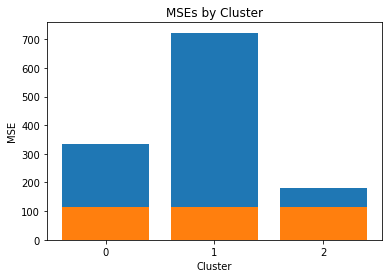

In [55]:
import numpy as np

mse_ = 116.03
mse_ = [mse_, mse_, mse_]
rmse_ = 10.77
rmse_ = [rmse_, rmse_, rmse_]
mse = [mse1, mse2, mse3]
rmse = [rmse1, rmse2, rmse3]

plt.bar((np.arange(0,3)).astype("int64"), mse)
plt.bar((np.arange(0,3)).astype("int64"), mse_)
plt.xticks([0, 1, 2])
plt.xlabel("Cluster")
plt.ylabel("MSE")
plt.title("MSEs by Cluster")
plt.savefig("plots/cluster_knn_mse")